## SER

**Files**

This portion of the RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song) contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

*Filename example: 03-01-06-01-02-01-12.wav*

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.

In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
audio = "/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

## Male Neutral

In [5]:
x,sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

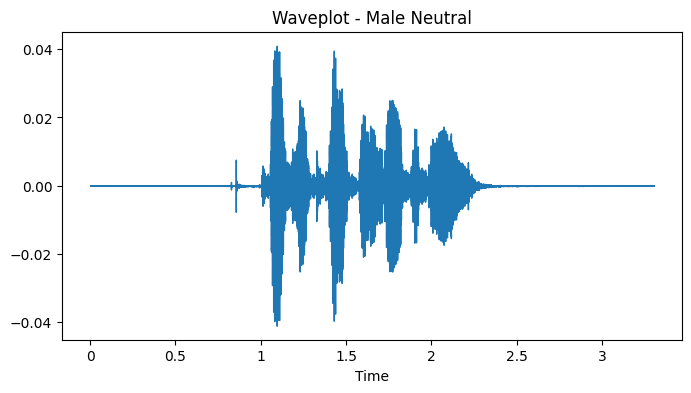

In [6]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

In [7]:
# PLAY AUDIO FILE
Audio(data=x, rate=sr)

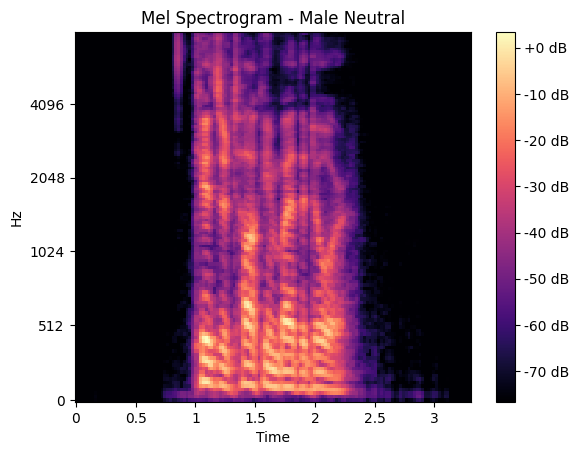

In [8]:
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB')

## Female Calm

In [9]:
# LOAD IN FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')

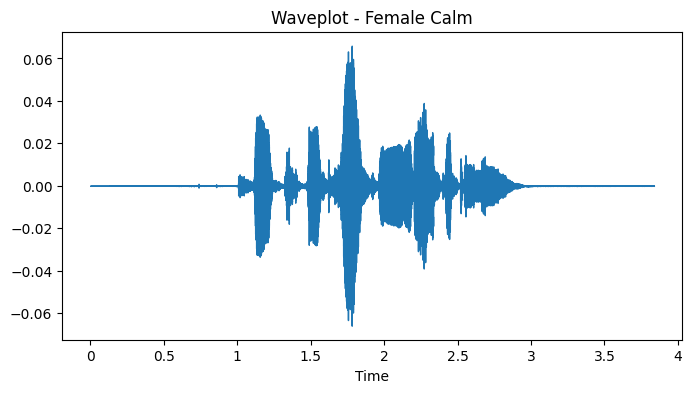

In [10]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

In [11]:
Audio(data=x, rate=sr)

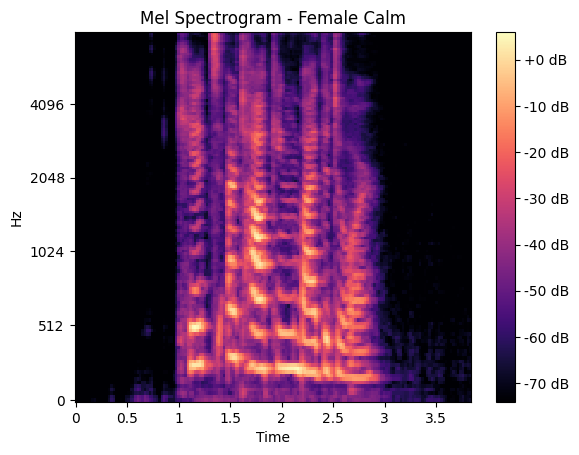

In [12]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB')

## Male Happy

In [13]:
# LOAD FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_03/03-01-03-01-01-01-03.wav')

In [14]:
Audio(data=x, rate=sr)

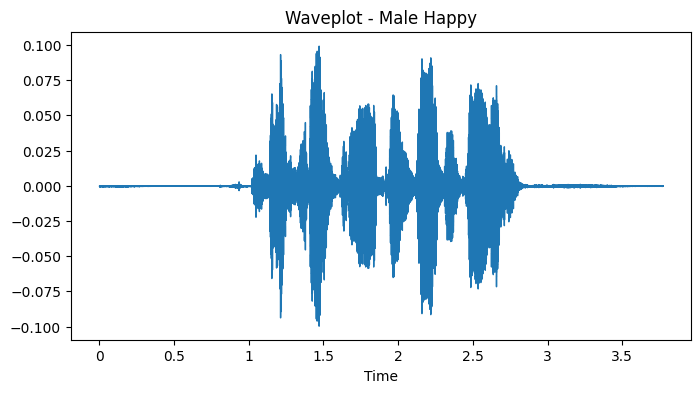

In [15]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

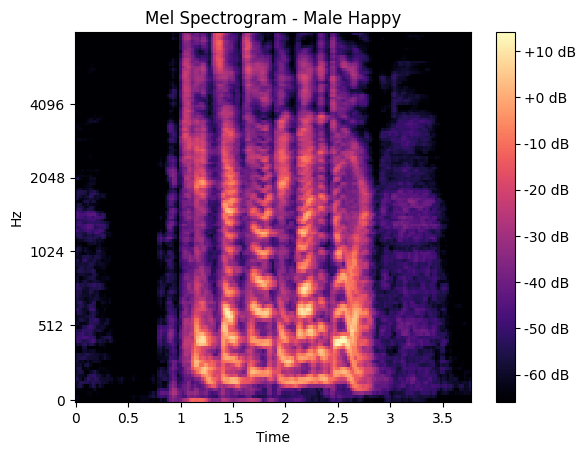

In [16]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB')

# Female Sad

In [17]:
# LOAD FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_04/03-01-04-01-02-01-04.wav')


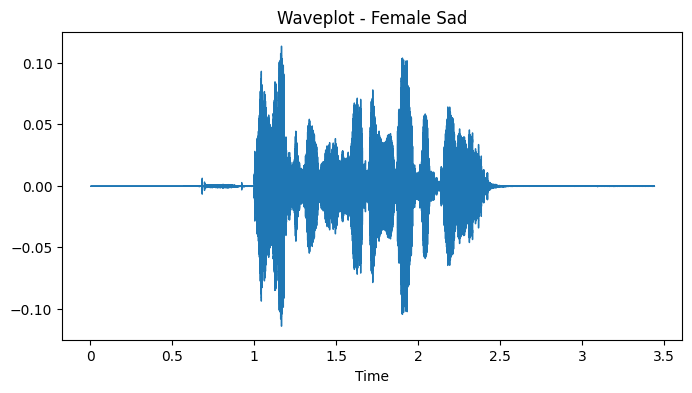

In [18]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

In [19]:
Audio(data=x, rate=sr)

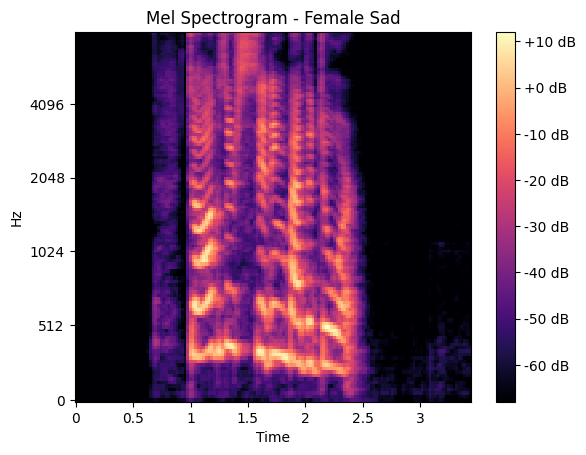

In [20]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Sad')
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB')

# Male Angry

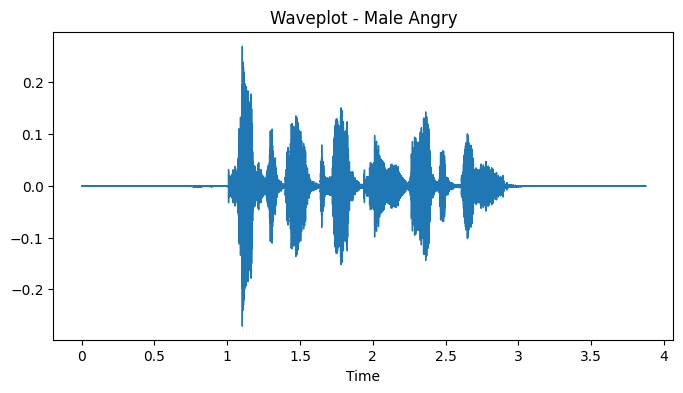

In [21]:
# LOAD FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-01-05.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

In [22]:
Audio(data=x, rate=sr)

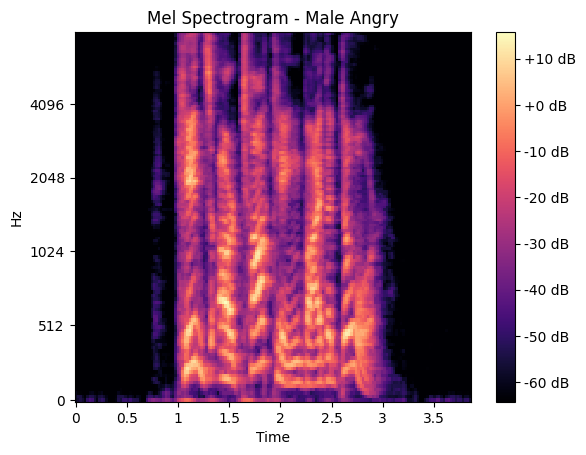

In [23]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Angry')
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB')

# Female Fearful

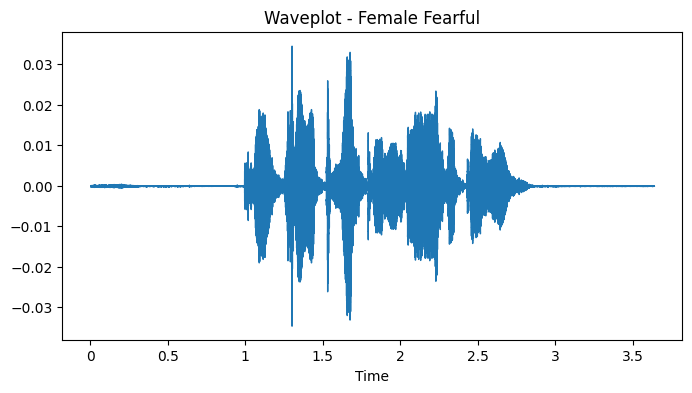

In [24]:
# LOAD FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_06/03-01-06-01-01-01-06.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')

In [25]:
Audio(data=x, rate=sr)

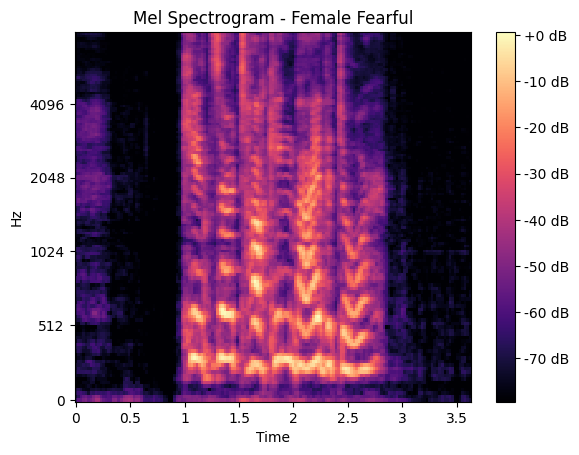

In [26]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB')

# Male Disgust

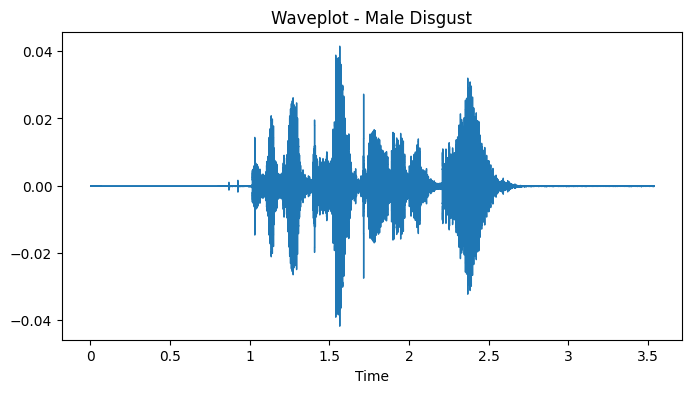

In [27]:
# LOAD FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_07/03-01-07-01-01-01-07.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')

In [28]:
Audio(data=x, rate=sr)

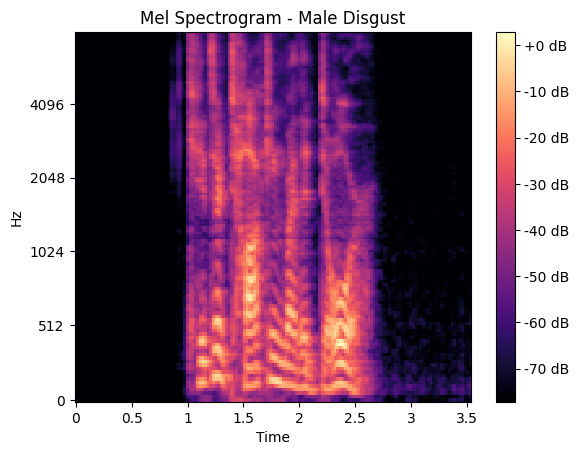

In [29]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB')

# Female Surprised

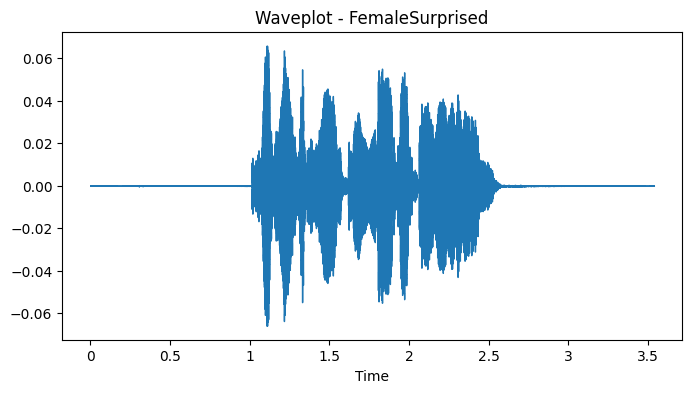

In [30]:
# LOAD FILE
x, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_18/03-01-08-02-01-02-18.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')

In [31]:
Audio(data=x, rate=sr)

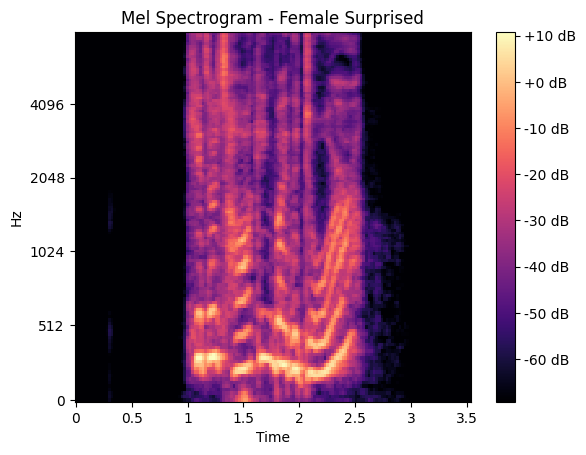

In [32]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB')

# Data Preprocessing

**Labeling Audio Files**

In [33]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)

In [34]:
audio_df

,gender,emotion,actor,path
0,male,happy,1,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
1,male,happy,1,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
2,male,happy,1,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
3,male,neutral,1,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
4,male,calm,1,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
...,...,...,...,...
1435,female,disgust,24,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
1436,female,fear,24,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
1437,female,disgust,24,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...
1438,female,surprise,24,/content/gdrive/MyDrive/RAVDESS_dataset/audio_...


<Axes: >

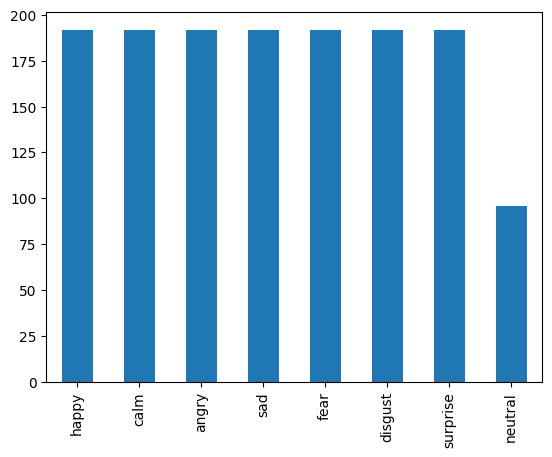

In [35]:
audio_df.emotion.value_counts().plot(kind='bar')

In [36]:
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

<ipython-input-36-a62bfd88e022>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,gender,emotion,actor,path
1341,male,angry,23,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_23/03-01-05-01-02-02-23.wav
34,male,fear,1,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_01/03-01-06-02-02-01-01.wav
1217,male,calm,21,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_21/03-01-02-01-02-01-21.wav
480,male,neutral,9,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_09/03-01-01-01-01-02-09.wav
703,female,fear,12,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_12/03-01-06-01-02-02-12.wav
653,male,surprise,11,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_11/03-01-08-02-02-01-11.wav
1282,female,happy,22,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_22/03-01-03-01-02-01-22.wav
144,male,angry,3,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_03/03-01-05-01-01-01-03.wav
308,female,calm,6,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_06/03-01-02-01-01-01-06.wav
795,female,happy,14,/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_14/03-01-03-01-02-02-14.wav


In [37]:
# EXPORT TO CSV
audio_df.to_csv('/content/gdrive/MyDrive/Uploads/audio.csv')

In [38]:
# FEATURE EXTRACTION ON RAW AUDIO FILES
df = pd.DataFrame(columns=['log_spec'])
counter=0

for index,path in enumerate(audio_df.path):
    #get wave representation
    X, sample_rate = librosa.load(path)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    df.loc[counter] = [log_spectrogram]   
    counter += 1
print(len(df))
df.head()

1440


,log_spec
0,"[-73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74005, -73.725845, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.74277, -73.73685, -73.22797, -73.490875, -71.3985, -66.90826, -63.613113, -61.97721, -61.92994, -61.289894, -60.962402, -61.06533, -62.851402, -66.59828, -69.56368, -70.93459, -71.49303, -72.29722, -70.33054, -45.73538, -36.80836, -34.451553, -33.156036, -32.260296, -32.67354, -33.784523, -33.259438, -31.75352, -32.406193, -33.637802, -37.023575, -42.89061, -41.323883, -38.06935, -39.11286, -37.236458, -35.613167, -36.889664, -37.226234, -34.88617, -35.011158, -38.287224, -40.264572, -41.71674, -41.234226, -38.197697, -32.340252, -31.636923, -34.18965, -32.209724, -31.867651, -32.57878, -35.915447, -40.285053, -42.191715, -44.666676, -41.227764, -35.37689, -32.563618, -32.719986, -34.083885, -34.658764, -37.048576, -40.082336, -39.2188, -38.97122, -44.743126, -52.151787, -42.250317, -33.38809, -31.191963, -32.421753, -34.41905, -37.699368, -40.82492, -41.20685, ...]"
1,"[-74.108025, -73.98657, -73.840256, -73.58238, -74.015144, -74.19698, -74.30233, -74.144714, -74.04845, -74.205, -73.963806, -73.99575, -74.263855, -74.33779, -74.293724, -74.05239, -74.27172, -74.29078, -74.06807, -73.99723, -74.32567, -74.35226, -74.375946, -74.375946, -74.375946, -74.375946, -74.375946, -74.375946, -74.375946, -71.24201, -70.60869, -73.669106, -72.610855, -72.65969, -74.34899, -74.375946, -74.375946, -73.40316, -70.37456, -70.62892, -73.5399, -73.11138, -56.81772, -38.797325, -32.32309, -32.9972, -33.995792, -33.446728, -32.878162, -34.242546, -35.85078, -34.823597, -33.753624, -33.674267, -35.138737, -39.93644, -46.687687, -40.34222, -33.751503, -33.741016, -37.50592, -38.636684, -38.441216, -40.751694, -43.213223, -41.116894, -38.565903, -39.409245, -37.578053, -35.46692, -36.140125, -37.388523, -39.778862, -41.925842, -41.009872, -35.349197, -33.5938, -34.310932, -36.231407, -38.20928, -34.004723, -33.05517, -33.467827, -36.05998, -39.942776, -43.039646, -45.78082, -47.575356, -39.22694, -33.848045, -33.195625, -33.803116, -33.30771, -31.495127, -31.903206, -34.95103, -37.67703, -35.90588, -35.774235, -40.59956, ...]"
2,"[-68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.304276, -67.61958, -66.684166, -65.90609, -66.264435, -66.64519, -66.59303, -66.297424, -66.99137, -67.611626, -67.69222, -67.81183, -67.90668, -68.09344, -68.076256, -68.22911, -68.29071, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.321724, -68.26729, -68.172516, -68.28304, -68.321724, -68.321724, -68.321724, -67.55356, -66.88057, -67.68068, -57.527916, -40.32428, -35.61783, -35.045147, -34.795452, -30.69561, -30.852407, -33.70773, -32.548714, -34.014805, -38.80609, -41.440746, -40.197754, -37.915028, -32.55432, -29.60977, -29.346817, -30.082668, -29.770838, -31.183249, -37.377632, -39.141445, -33.2841, -31.38102, -32.01518, -32.305405, -32.75776, -30.29978, -26.069426, -25.543877, -23.733778, -20.868877, -23.071337, -29.308905, -30.161617, -30.298605, -30.015654, -28.648321, -29.360792, -30.972336, -32.58425, -35.274628, -39.00596, -33.457752, -27.585585, -26.360723, -27.486485, -28.187279, -29.078373, -33.136444, -37.85235, -33.119957, -30.50673, -34.367313, -43.31691, -40.017174, -29.37165, -24.666307, ...]"
3,"[-76.13767, -76.13767, -76.13767, -76.13767, -75.87132, -75.731735, -76.044464, -75.88165, -75.75462, -75.89853, -75.79901, -75.732506, -75.6817, -75.80389, -75.30942, -75.42005, -75.89959, -76.090034, -76.00342, -75.91317, -75.99347, -75.71202, -75.75718, -75.70256, -75.75108, -76.12824, -76.13767, -76.04226, -75.61777, -75.64098, -75.98382, -76.0776, -75.71826, -75.65135, -69.17431, -66.16513, -58.966675, -55.554577, -61.064453, -71.89989, -74.981346, -73.073395, -68.7742, -50.513226, -43.6

In [39]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['log_spec'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [40]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [41]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,218,219,220,221,222,223,224,225,226,227
0,male,happy,1,-73.742767,-73.742767,-73.742767,-73.742767,-73.742767,-73.742767,-73.742767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,male,happy,1,-74.108025,-73.986572,-73.840256,-73.582382,-74.015144,-74.196983,-74.302330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,male,happy,1,-68.321724,-68.321724,-68.321724,-68.321724,-68.321724,-68.321724,-68.321724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,male,neutral,1,-76.137672,-76.137672,-76.137672,-76.137672,-75.871323,-75.731735,-76.044464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,male,calm,1,-78.713280,-78.678596,-78.661110,-78.713280,-78.713280,-78.713280,-78.713280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prepping Data for Modeling

In [42]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [43]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 228)


In [44]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 228)


In [45]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [46]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [47]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [49]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 228, 1)

In [50]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.05555555555555555

# Model

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 219, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 210, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 26, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

In [53]:
model_history=model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_test, y_test))

model_save = model.save('my_model.h5')

Epoch 1/50
36/36 [==============================] - 8s 156ms/step - loss: 2.4666 - accuracy: 0.2439 - val_loss: 2.0375 - val_accuracy: 0.3715
Epoch 2/50
36/36 [==============================] - 4s 120ms/step - loss: 1.9639 - accuracy: 0.3099 - val_loss: 1.8018 - val_accuracy: 0.3333
Epoch 3/50
36/36 [==============================] - 6s 156ms/step - loss: 1.8013 - accuracy: 0.3316 - val_loss: 1.7196 - val_accuracy: 0.3924
Epoch 4/50
36/36 [==============================] - 6s 165ms/step - loss: 1.7495 - accuracy: 0.3516 - val_loss: 1.6711 - val_accuracy: 0.3819
Epoch 5/50
36/36 [==============================] - 4s 122ms/step - loss: 1.6963 - accuracy: 0.3733 - val_loss: 1.6166 - val_accuracy: 0.4236
Epoch 6/50
36/36 [==============================] - 6s 181ms/step - loss: 1.6505 - accuracy: 0.3837 - val_loss: 1.5976 - val_accuracy: 0.4271
Epoch 7/50
36/36 [==============================] - 4s 122ms/step - loss: 1.6087 - accuracy: 0.3724 - val_loss: 1.5830 - val_accuracy: 0.4028
Epoch 

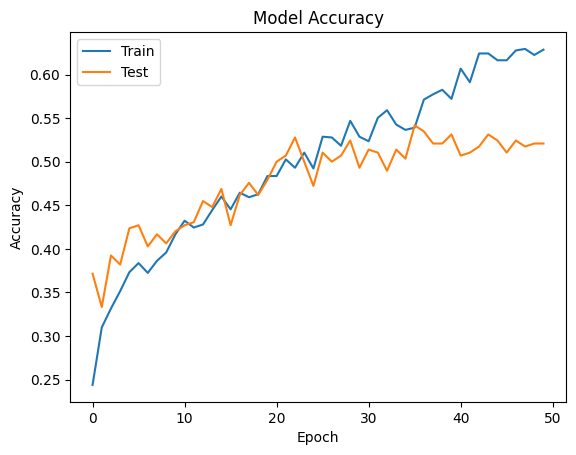

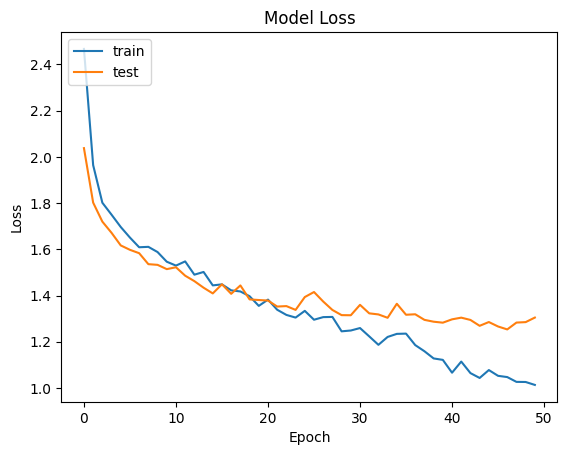

In [54]:
#PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

# Post-Model Analysis

In [55]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 28ms/step - loss: 1.3046 - accuracy: 0.5208
Loss of the model is -  1.3045859336853027
9/9 [==============================] - 0s 29ms/step - loss: 1.3046 - accuracy: 0.5208
Accuracy of the model is -  52.08333134651184 %


In [56]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[130:150]

9/9 [==============================] - 0s 28ms/step


,Actual Values,Predicted Values
130,happy,happy
131,surprise,happy
132,happy,happy
133,disgust,fear
134,sad,calm
135,calm,neutral
136,disgust,sad
137,neutral,neutral
138,sad,angry
139,fear,fear


## Metrics

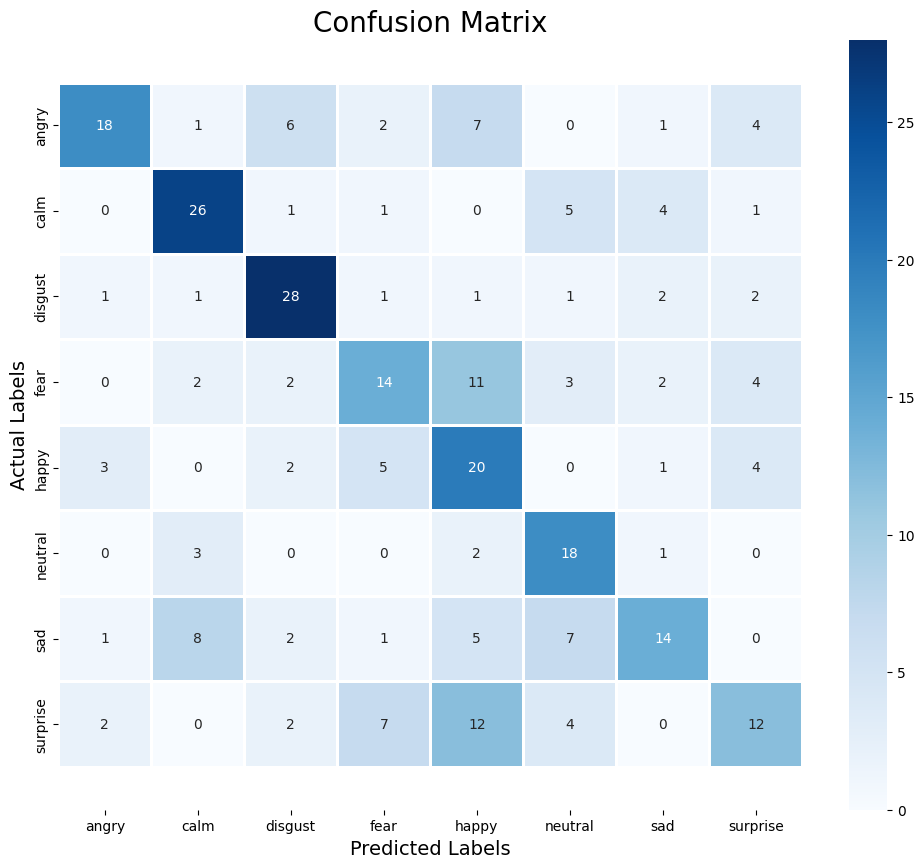

In [57]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [58]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.72      0.46      0.56        39
        calm       0.63      0.68      0.66        38
     disgust       0.65      0.76      0.70        37
        fear       0.45      0.37      0.41        38
       happy       0.34      0.57      0.43        35
     neutral       0.47      0.75      0.58        24
         sad       0.56      0.37      0.44        38
    surprise       0.44      0.31      0.36        39

    accuracy                           0.52       288
   macro avg       0.53      0.53      0.52       288
weighted avg       0.54      0.52      0.52       288



In [82]:
import librosa
import numpy as np
import tensorflow as tf

# Load the audio file
y, sr = librosa.load('/content/gdrive/MyDrive/RAVDESS_dataset/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')

# Extract the MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Normalize the MFCCs
mfccs_normalized = (mfccs - np.mean(mfccs)) / np.std(mfccs)

# Resize the MFCCs to match the model's input shape
mfccs_resized = np.resize(mfccs_normalized, (1, 228, 1))

# Load the model
model = tf.keras.models.load_model('my_model.h5')

# Predict the label for the audio file
y_pred = model.predict(mfccs_resized)
emotion_labels = ['angry','disgust','fear', 'happy', 'neutral', 'sad' ,'surprise','calm']
predicted_label = emotion_labels[np.argmax(y_pred)]

print('Predicted emotion:', predicted_label)


1/1 [==============================] - 0s 109ms/step
Predicted emotion: disgust


In [110]:
def predict_emotion(audio_file, model):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=16000)

    # Compute the Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512, n_mels=40)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = np.expand_dims(mel_spec_db, axis=-1)
    mel_spec_db = cv2.resize(mel_spec_db, (228, 1), interpolation=cv2.INTER_CUBIC)

    # Make the prediction
    prediction = np.argmax(model.predict(mel_spec_db))
    print(prediction)

    # Return the predicted emotion label 1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'
    if prediction == 0:
        return 'neutral'
    elif prediction == 1:
        return 'calm'
    elif prediction == 2:
        return 'happy'
    elif prediction == 3:
        return 'sad'
    elif prediction == 4:
        return 'angry'
    elif prediction == 5:
        return 'fear'
    elif prediction == 6:
        return 'disgust'
    elif prediction == 7:
        return 'surprise'

In [115]:
import cv2
model = tf.keras.models.load_model('my_model.h5')
output = predict_emotion('/content/gdrive/MyDrive/RAVDESS_dataset/Actor_07/03-01-05-01-01-01-07.wav',model)
print(output)

1/1 [==============================] - 0s 114ms/step
1
calm
